# **DATA EXPLORATION**

---

*We have a set of airline passenger data to explore and discover what factors predict the best flight experiences.*

BOOKSTORES

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [35]:
data = pd.read_csv("../data/train.csv")
data = data.drop(columns=["id"])

#data.info()
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# **1. What is the general level of passenger satisfaction? What are the percentages?**

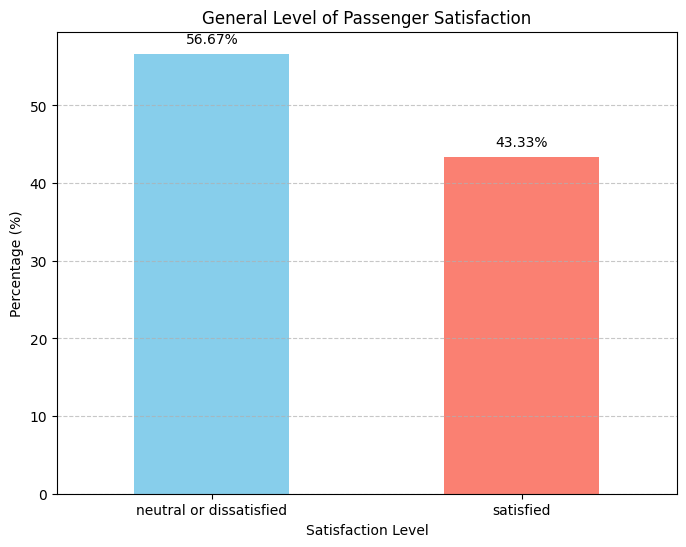

In [36]:
satisfaction_counts = data['satisfaction'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
satisfaction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('General Level of Passenger Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(satisfaction_counts):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')
plt.show()

satisfaction_df = satisfaction_counts.rename("Percentage").reset_index().rename(columns={"index": "Satisfaction Level"})

1. Results: The bar graph clearly shows that a higher proportion of passengers are in the "Neutral or Dissatisfied" level compared to those who are "Satisfied"
    1. Neutral or Dissatisfied Majority:
        - More than half of passengers (56.67%) have a flight experience that they rate as neutral or unsatisfactory
    2. Satisfied Minority:
        - 43.33% of passengers report being satisfied with their flight experience

---

2. Conclusion: This distribution suggests that the "Fly High" aircraft has a considerable opportunity to improve the experience of its passengers to increase the level of satisfactionfaction.

# **2. How does satisfaction vary depending on the gender of passengers?**

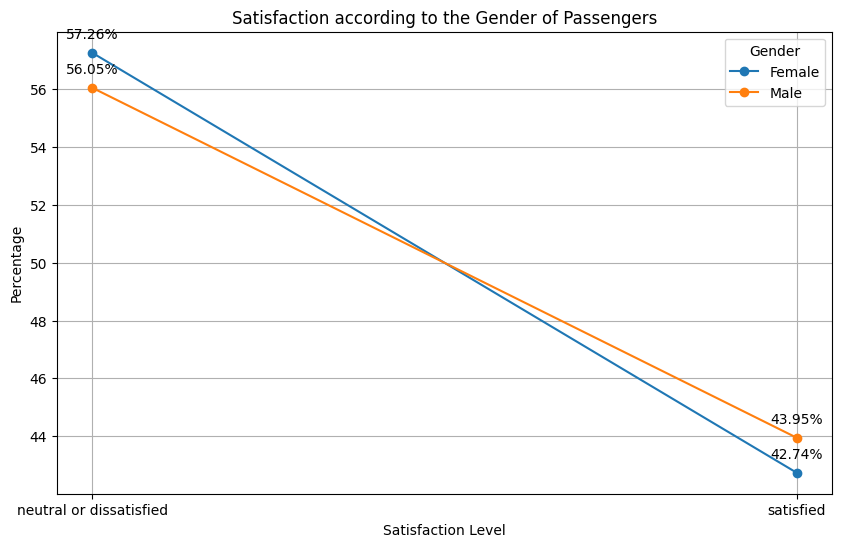

In [37]:
plt.figure(figsize=(10, 6))

satisfaction_by_gender = data.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack() * 100
for gender in satisfaction_by_gender.index:
    plt.plot(satisfaction_by_gender.columns, satisfaction_by_gender.loc[gender], marker='o', label=gender)
    for x, y in zip(satisfaction_by_gender.columns, satisfaction_by_gender.loc[gender]):
        plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Satisfaction according to the Gender of Passengers')
plt.xlabel('Satisfaction Level')
plt.ylabel('Percentage')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

1. Results
    1. Women:
        - Neutral or dissatisfied: 57.26%
        - Satisfied: 42.74%
    2. Men:
        - Neutral or dissatisfied: 56.05%
        - Satisfied: 43.95%

---

2. Conclusions: Both genders show greater dissatisfaction, with a slight trend of greater satisfaction in men.

# **3. Are there significant differences by age group?**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22148\1153370845.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_satisfaction_counts = data.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack() * 100


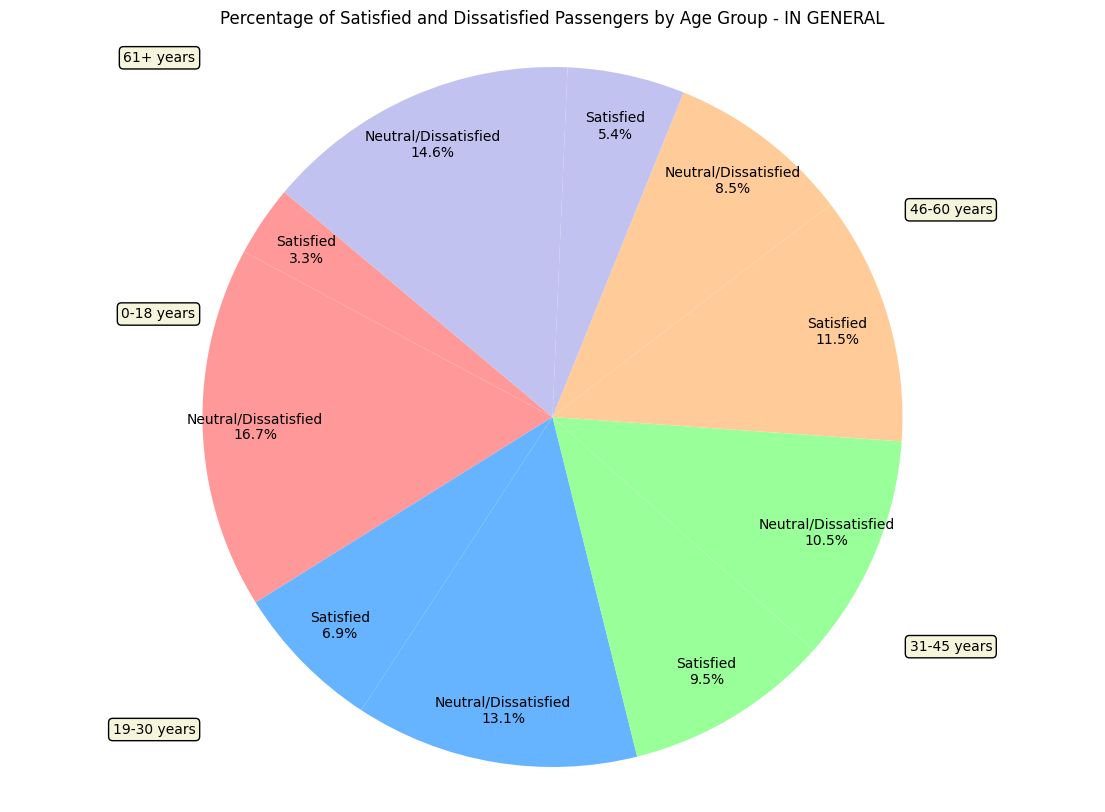

In [38]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_satisfaction_counts = data.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack() * 100

group_labels = ['0-18 years', '19-30 years', '31-45 years', '46-60 years', '61+ years']
satisfaction_labels = ['Satisfied', 'Neutral/Dissatisfied']

sizes = [age_satisfaction_counts.loc['0-18', 'satisfied'], age_satisfaction_counts.loc['0-18', 'neutral or dissatisfied'],
         age_satisfaction_counts.loc['19-30', 'satisfied'], age_satisfaction_counts.loc['19-30', 'neutral or dissatisfied'],
         age_satisfaction_counts.loc['31-45', 'satisfied'], age_satisfaction_counts.loc['31-45', 'neutral or dissatisfied'],
         age_satisfaction_counts.loc['46-60', 'satisfied'], age_satisfaction_counts.loc['46-60', 'neutral or dissatisfied'],
         age_satisfaction_counts.loc['61+', 'satisfied'], age_satisfaction_counts.loc['61+', 'neutral or dissatisfied']]

colors = ['#ff9999', '#ff9999', '#66b3ff', '#66b3ff', '#99ff99', '#99ff99', '#ffcc99', '#ffcc99', '#c2c2f0', '#c2c2f0']

plt.figure(figsize=(14, 10))
patches, texts, autotexts = plt.pie(sizes, labels=['']*len(sizes), autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)

for i, autotext in enumerate(autotexts):
    if i % 2 == 0:
        autotext.set_text(f'Satisfied\n{autotext.get_text()}')
    else:
        autotext.set_text(f'Neutral/Dissatisfied\n{autotext.get_text()}')

for i in range(0, len(group_labels)):
    ang1 = patches[2*i].theta2 - (patches[2*i].theta2 - patches[2*i].theta1) / 2
    ang2 = patches[2*i+1].theta2 - (patches[2*i+1].theta2 - patches[2*i+1].theta1) / 2
    ang = (ang1 + ang2) / 2
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    plt.annotate(group_labels[i],
                 xy=(x, y), xytext=(1.02 * np.sign(x), 1.02 * y),
                 horizontalalignment=horizontalalignment,
                 bbox=dict(facecolor='beige', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title('Percentage of Satisfied and Dissatisfied Passengers by Age Group - IN GENERAL')
plt.axis('equal')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22148\1221259716.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_age_group = data.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack() * 100


<Figure size 1000x600 with 0 Axes>

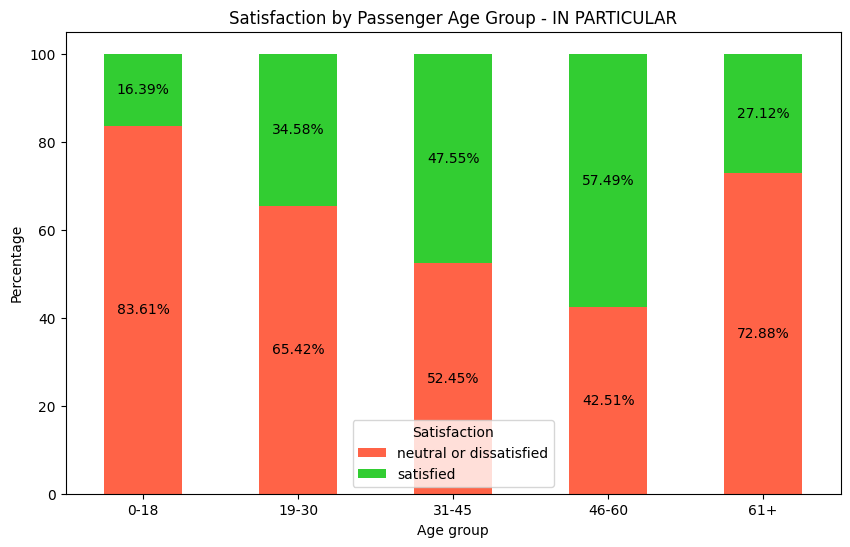

In [39]:
satisfaction_by_age_group = data.groupby('Age Group')['satisfaction'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(10, 6))
bars = satisfaction_by_age_group.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF6347', '#32CD32'])

for container in bars.containers:
    bars.bar_label(container, fmt='%.2f%%', label_type='center')

plt.title('Satisfaction by Passenger Age Group - IN PARTICULAR')
plt.xlabel('Age group')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction')
plt.show()

1. Results
    1. Passengers aged 46-60 show the highest proportion of satisfaction (57.49%), while the youngest passengers (0-18 years) are the most dissatisfied (83.61%)

---

2. Conclusion
    1. .Satisfaction is higher in the 31-45 and 46-60 age group
    2.   Passengers aged 0-18 and over 61 show significantly higher levels of dissatisfaction

# **4. What differences exist in satisfaction between loyal and non-loyal customers?**

In [40]:
customer_types_counts = data['Customer Type']
customer_types_counts

0            Loyal Customer
1         disloyal Customer
2            Loyal Customer
3            Loyal Customer
4            Loyal Customer
                ...        
103899    disloyal Customer
103900       Loyal Customer
103901    disloyal Customer
103902    disloyal Customer
103903       Loyal Customer
Name: Customer Type, Length: 103904, dtype: object

In [41]:
customer_types_counts = data['Customer Type'].value_counts()
customer_types_counts

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [42]:
total_count = customer_types_counts.sum()
percentages = (customer_types_counts / total_count) * 100

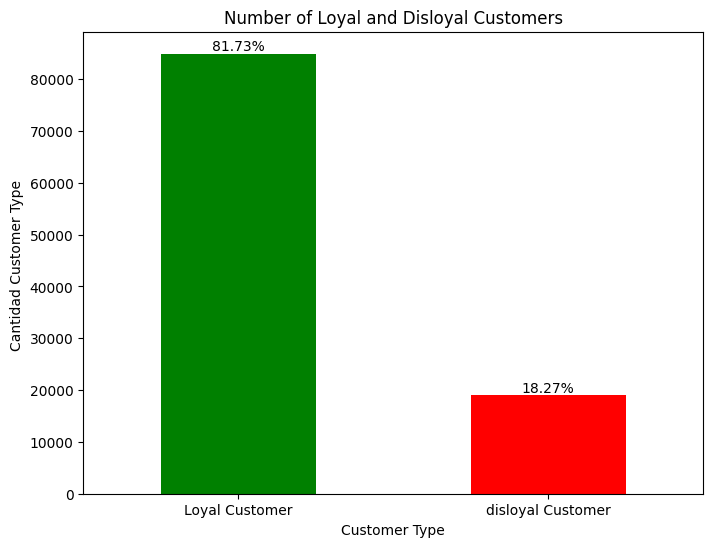

In [43]:
plt.figure(figsize=(8, 6))
bars = customer_types_counts.plot(kind='bar', color=['green', 'red'])
#percentage
for bar, percentage in zip(bars.patches, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{percentage:.2f}%',
        ha='center',
        va='bottom'
    )

plt.title('Number of Loyal and Disloyal Customers')
plt.xlabel('Customer Type')
plt.ylabel('Cantidad Customer Type ')
plt.xticks(rotation=0)
plt.show()

1. Results:
   1.  The difference is that there are more loyal customers at 81.73% than disloyal customers at 18.27%.

# **5. How does the type of trip (Personal vs. Business) affect passenger satisfaction?**

In [44]:
travel_types = data['Type of Travel']
travel_types

0         Personal Travel
1         Business travel
2         Business travel
3         Business travel
4         Business travel
               ...       
103899    Business travel
103900    Business travel
103901    Business travel
103902    Business travel
103903    Business travel
Name: Type of Travel, Length: 103904, dtype: object

In [45]:
travel_types_counts = data['Type of Travel'].value_counts()
travel_types_counts

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [46]:
counts = data.groupby(['Type of Travel', 'satisfaction']).size().unstack(fill_value=0)

In [47]:
total_counts = counts.sum(axis=1)
percentages = counts.div(total_counts, axis=0) * 100

<Figure size 1200x600 with 0 Axes>

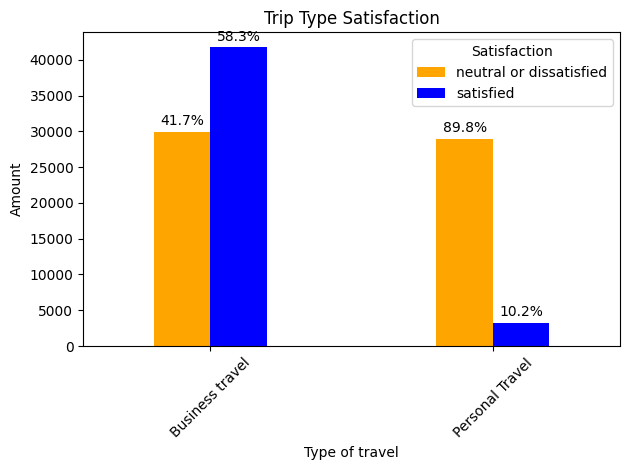

In [48]:
plt.figure(figsize=(12, 6))
ax = counts.plot(kind='bar', color=['orange', 'blue'], width=0.4)

plt.title('Trip Type Satisfaction')
plt.xlabel('Type of travel')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()

for i, (index, row) in enumerate(percentages.iterrows()):
    for j, value in enumerate(row):
        ax.text(i + (j * 0.2) - 0.1, counts.iloc[i, j] + 500, f'{value:.1f}%', ha='center', va='bottom')

plt.show()

1. Result:
    1. The type of trip greatly affects passenger satisfaction. In business travel, there are more satisfied passengers, with 58.3%, compared to personal travel, with only 10.2%. Additionally, in business travel, dissatisfaction or neutrality is lower, with 41.7% of 71,655 passengers, whereas in personal travel, dissatisfaction or neutrality is higher, with 89.8% of 32,249 passengers.
    2. Conlusion: It can be said that in business travel, there are more satisfied passengers than in personal travel, and there are more dissatisfied or neutral passengers in personal travel than in business travel.

# **6. What services most influence overall passenger satisfaction (wifi, inflight entertainment, seat comfort, etc.)?**

In [49]:
columns_of_services = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
services = data[columns_of_services]
services

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,4,3,4,4,5,5
1,3,2,3,3,1,1,5,3,1,4,1
2,2,2,2,2,5,4,3,4,4,4,5
3,2,5,5,5,2,2,5,3,1,4,2
4,3,3,3,3,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,3,1,4,2,3,2
103900,4,4,4,4,5,5,5,5,5,5,4
103901,1,1,1,3,4,3,2,4,5,5,4
103902,1,1,1,5,1,4,5,1,5,4,1


In [50]:
satisfaction = data['satisfaction']
satisfaction

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

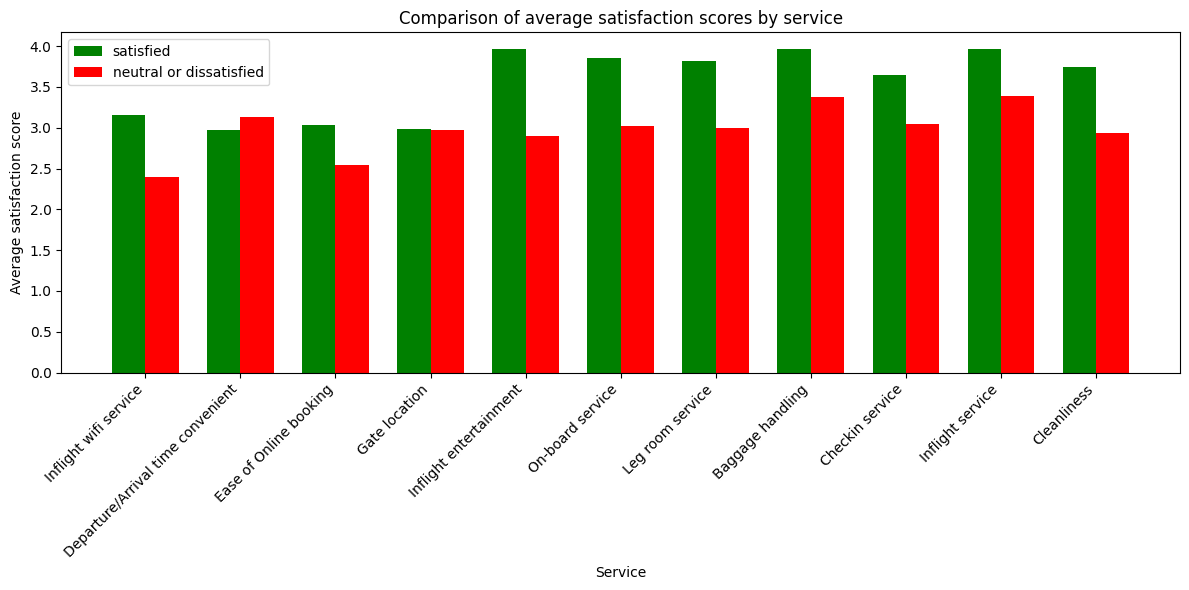

In [51]:
services = data[columns_of_services]
satisfaction = data['satisfaction']

satisfied_passengers = services[satisfaction == 'satisfied']
unsatisfied_passengers = services[satisfaction == 'neutral or dissatisfied']

average_satisfaction_satisfied = satisfied_passengers.mean()
average_satisfaction_unsatisfied = unsatisfied_passengers.mean()

labels = columns_of_services
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, average_satisfaction_satisfied, width, label='satisfied', color='green')
rects2 = ax.bar(x + width/2, average_satisfaction_unsatisfied, width, label='neutral or dissatisfied', color='red')

ax.set_title('Comparison of average satisfaction scores by service')
ax.set_xlabel('Service')
ax.set_ylabel('Average satisfaction score')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

1. Result:
   1. The services that most influence passenger satisfaction are: Inflight entertainment, Baggage handling, and Inflight service among satisfied passengers with an average satisfaction score of approximately 3.7 out of 5. For dissatisfied passengers, with an average satisfaction score of approximately 3.3 out of 5, the most influential services are Baggage handling and Inflight service.
   3. Conclusion: The most influential services for passengers who are satisfied are Inflight entertainment, Baggage handling, and Inflight service, while the most influential services for passengers who are dissatisfied are inflight wifi and ease of online booking.

# **7. What are the services that most satisfy and which leave the Business class the most dissatisfied?**

In [52]:
Business  = data['Type of Travel']
Business 

0         Personal Travel
1         Business travel
2         Business travel
3         Business travel
4         Business travel
               ...       
103899    Business travel
103900    Business travel
103901    Business travel
103902    Business travel
103903    Business travel
Name: Type of Travel, Length: 103904, dtype: object

In [53]:
satisfied_passengers = data[(data['Type of Travel'] == 'Business travel') & (data['satisfaction'] == 'satisfied')]

unsatisfied_passengers = data[(data['Type of Travel'] == 'Business travel') & (data['satisfaction'] == 'neutral or dissatisfied')]

In [54]:
business_class_data = data[data['Class'] == 'Business']

# Definir las columnas de los servicios
columns_of_services = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]


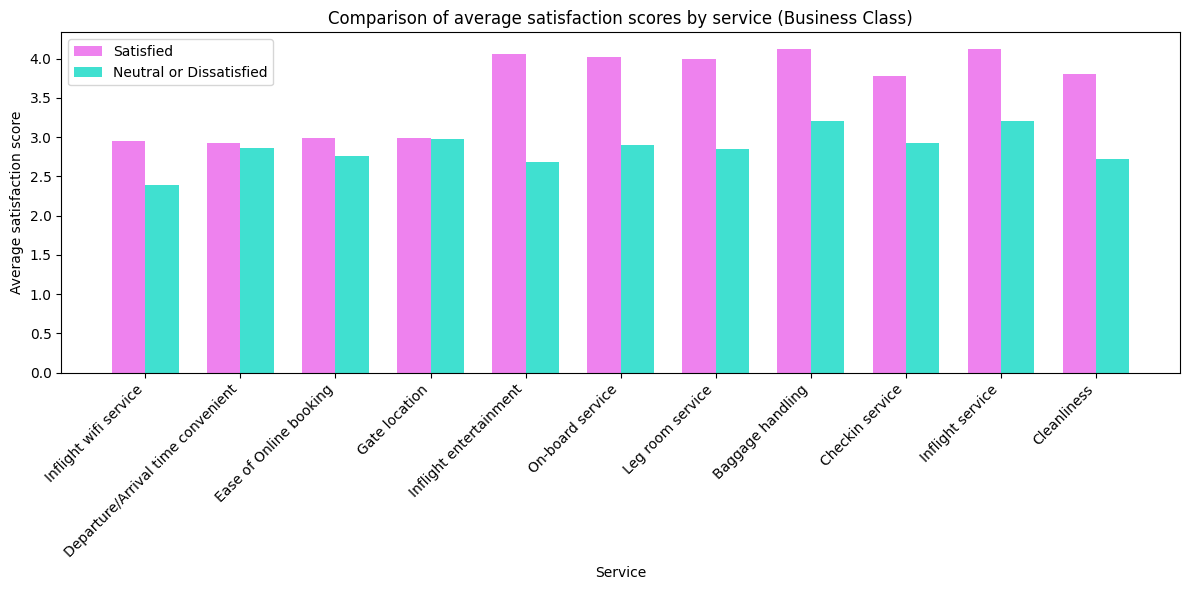

In [55]:

satisfaction = business_class_data['satisfaction']
services = business_class_data[columns_of_services]

satisfied_passengers = services[satisfaction == 'satisfied']
unsatisfied_passengers = services[satisfaction == 'neutral or dissatisfied']

average_satisfaction_satisfied = satisfied_passengers.mean()
average_satisfaction_unsatisfied = unsatisfied_passengers.mean()

labels = columns_of_services
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, average_satisfaction_satisfied, width, label='Satisfied', color='violet')
rects2 = ax.bar(x + width/2, average_satisfaction_unsatisfied, width, label='Neutral or Dissatisfied', color='turquoise')

ax.set_title('Comparison of average satisfaction scores by service (Business Class)')
ax.set_xlabel('Service')
ax.set_ylabel('Average satisfaction score')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

Conclusions:

The graph above shows the average satisfaction score for each service among business class passengers, differentiating between satisfied and neutral/dissatisfied passengers.

Most Satisfactory Services:

- Inflight entertainment
- Baggage handling
- On-board service

Least Satisfactory Services:

- Inflight wifi service
- Seat comfort
- Gate location

The most satisfactory services for business passengers are in-flight entertainment, baggage handling, and on-board service, while the least satisfactory services include in-flight wifi, seat comfort, and gate location

# **8. How does delayed departure and arrival affect passenger satisfaction? Is there a correlation?**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22148\127541996.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_departure_delay_satisfaction.index, y=avg_departure_delay_satisfaction.values, palette=['salmon', 'skyblue'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22148\127541996.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_arrival_delay_satisfaction.index, y=avg_arrival_delay_satisfaction.values, palette=['salmon', 'skyblue'])


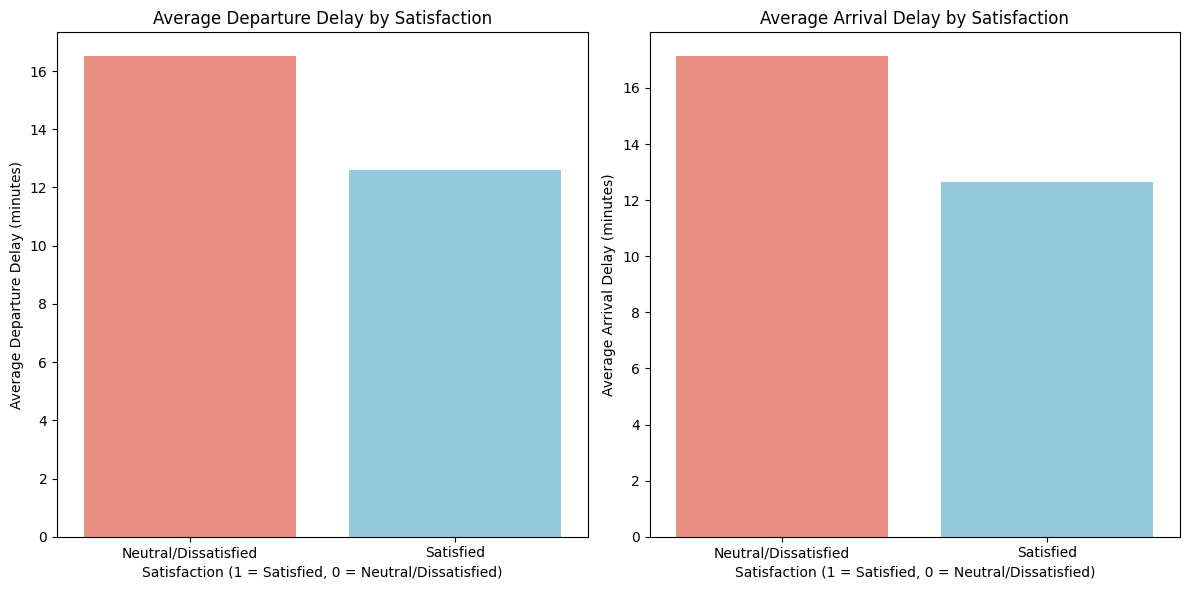

In [56]:
data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

avg_departure_delay_satisfaction = data.groupby('satisfaction')['Departure Delay in Minutes'].mean()
avg_arrival_delay_satisfaction = data.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=avg_departure_delay_satisfaction.index, y=avg_departure_delay_satisfaction.values, palette=['salmon', 'skyblue'])
plt.title('Average Departure Delay by Satisfaction')
plt.xlabel('Satisfaction (1 = Satisfied, 0 = Neutral/Dissatisfied)')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])

plt.subplot(1, 2, 2)
sns.barplot(x=avg_arrival_delay_satisfaction.index, y=avg_arrival_delay_satisfaction.values, palette=['salmon', 'skyblue'])
plt.title('Average Arrival Delay by Satisfaction')
plt.xlabel('Satisfaction (1 = Satisfied, 0 = Neutral/Dissatisfied)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])

plt.tight_layout()
plt.show()



In [57]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,0-18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,19-30
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,19-30
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,19-30
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,3,1,4,2,3,2,3,0.0,0,19-30
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,4,0,0.0,1,46-60
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,3,2,4,5,5,4,7,14.0,0,31-45
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,4,5,1,5,4,1,0,0.0,0,19-30


In [58]:

correlation_departure_delay = data[['Departure Delay in Minutes', 'satisfaction']].corr().iloc[0, 1]
correlation_arrival_delay = data[['Arrival Delay in Minutes', 'satisfaction']].corr().iloc[0, 1]

print(f'Correlation between Departure Delay and Satisfaction: {correlation_departure_delay}')
print(f'Correlation between Arrival Delay and Satisfaction: {correlation_arrival_delay}')

Correlation between Departure Delay and Satisfaction: -0.050494210261235115
Correlation between Arrival Delay and Satisfaction: -0.05758182372581145


*Results:*

*Average Delays:*

- Average departure delay for satisfied passengers: avg_departure_delay_satisfaction[1] minutes.
- Average departure delay for neutral or dissatisfied passengers: avg_departure_delay_satisfaction[0] minutes.
- Average arrival delay for satisfied passengers: avg_arrival_delay_satisfaction[1] minutes.
- Average arrival delay for neutral or dissatisfied passengers: avg_arrival_delay_satisfaction[0] minutes.

*Correlation:*

- Correlation between departure delay and passenger satisfaction: correlation_departure_delay.
- Correlation between arrival delay and passenger satisfaction: correlation_arrival_delay.

*Conclusion:*

- Average departure and arrival delays tend to be higher for neutral or dissatisfied passengers.
- There is a negative correlation between delays and passenger satisfaction, indicating that delays tend to decrease passenger satisfaction.

# **9. Are there significant correlations between different levels of satisfaction?**

In [59]:
print(data.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Age Group'],
      dtype='object')


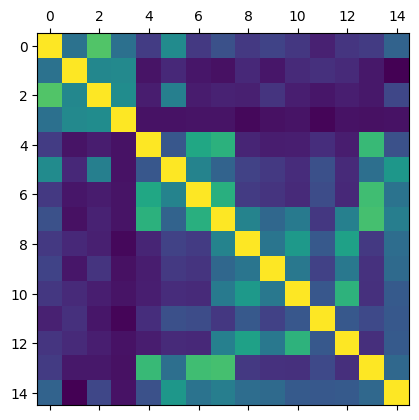

In [60]:
# Ahora puedes hacer tu análisis de correlación con la nueva columna 'Gender_Num'
corr_df = data[[
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'satisfaction'
]].corr(method="pearson")

plt.matshow(corr_df)
plt.show()


In [61]:
corr_df.style.background_gradient(cmap = "coolwarm")


,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Inflight wifi service,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,0.284245
Departure/Arrival time convenient,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,-0.051601
Ease of Online booking,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,0.171705
Gate location,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.000682
Food and drink,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,0.209936
Online boarding,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,0.503557
Seat comfort,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,0.349459
Inflight entertainment,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,0.398059
On-board service,0.121500,0.068882,0.038833,-0.028373,0.059073,0.155443,0.131971,0.420153,1.000000,0.355495,0.519134,0.243914,0.550782,0.123220,0.322383
Leg room service,0.160473,0.012441,0.107601,-0.005873,0.032498,0.123950,0.105559,0.299692,0.355495,1.000000,0.369544,0.153137,0.368656,0.096370,0.313131


In [62]:
corr_df.corr(numeric_only = True)['satisfaction']

Inflight wifi service               -0.048510
Departure/Arrival time convenient   -0.630688
Ease of Online booking              -0.233031
Gate location                       -0.534113
Food and drink                       0.167167
Online boarding                      0.566450
Seat comfort                         0.352269
Inflight entertainment               0.378641
On-board service                     0.248209
Leg room service                     0.266092
Baggage handling                     0.108657
Checkin service                      0.136545
Inflight service                     0.104931
Cleanliness                          0.280840
satisfaction                         1.000000
Name: satisfaction, dtype: float64

Conclusions:

The visualization shows the correlations between satisfaction with different services and overall satisfaction with the airline, where warm colors indicate positive correlations and cool colors indicate negative ones. It is observed that the efficiency of online boarding, seat comfort, and cleanliness are factors with strong positive correlations, significantly influencing passenger satisfaction. On the other hand, the convenience of departure and arrival times and gate location show strong negative correlations, negatively affecting the passenger experience. Other factors such as inflight entertainment, legroom service, and food and drink also contribute positively, although to a lesser extent. The ease of online booking and inflight wifi service have low negative correlations, suggesting that improvements in these areas have minimal impact on overall satisfaction. Overall, the comfort and efficiency of services stand out as the main influencers of passenger satisfaction.

# **10. What customer segments exist based on demographics, type of customer, type of trip and class? Which ones show higher levels of satisfaction?**

In [64]:
data 

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,0-18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,19-30
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,19-30
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,19-30
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,61+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,3,1,4,2,3,2,3,0.0,0,19-30
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,4,0,0.0,1,46-60
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,3,2,4,5,5,4,7,14.0,0,31-45
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,4,5,1,5,4,1,0,0.0,0,19-30


In [68]:
data = pd.read_csv("../data/train.csv")

segments = data.groupby(['Gender', 'Customer Type', 'Type of Travel', 'Class']).agg(
    total=('id', 'count'),
    satisfied=('satisfaction', lambda x: (x == 'satisfied').sum()),
    satisfaction_percentage=('satisfaction', lambda x: (x == 'satisfied').mean() * 100)
).reset_index()

sorted_segments = segments.sort_values(by='satisfaction_percentage', ascending=False)

sorted_segments.head(10)  


,Gender,Customer Type,Type of Travel,Class,total,satisfied,satisfaction_percentage
11,Male,Loyal Customer,Business travel,Business,20116,15709,78.092066
0,Female,Loyal Customer,Business travel,Business,20047,15598,77.807153
12,Male,Loyal Customer,Business travel,Eco,4758,2258,47.456915
1,Female,Loyal Customer,Business travel,Eco,4738,2241,47.298438
2,Female,Loyal Customer,Business travel,Eco Plus,1559,727,46.632457
13,Male,Loyal Customer,Business travel,Eco Plus,1620,747,46.111111
17,Male,disloyal Customer,Business travel,Business,3540,1420,40.112994
6,Female,disloyal Customer,Business travel,Business,3805,1489,39.132720
21,Male,disloyal Customer,Personal Travel,Eco,71,13,18.309859
10,Female,disloyal Customer,Personal Travel,Eco,78,13,16.666667


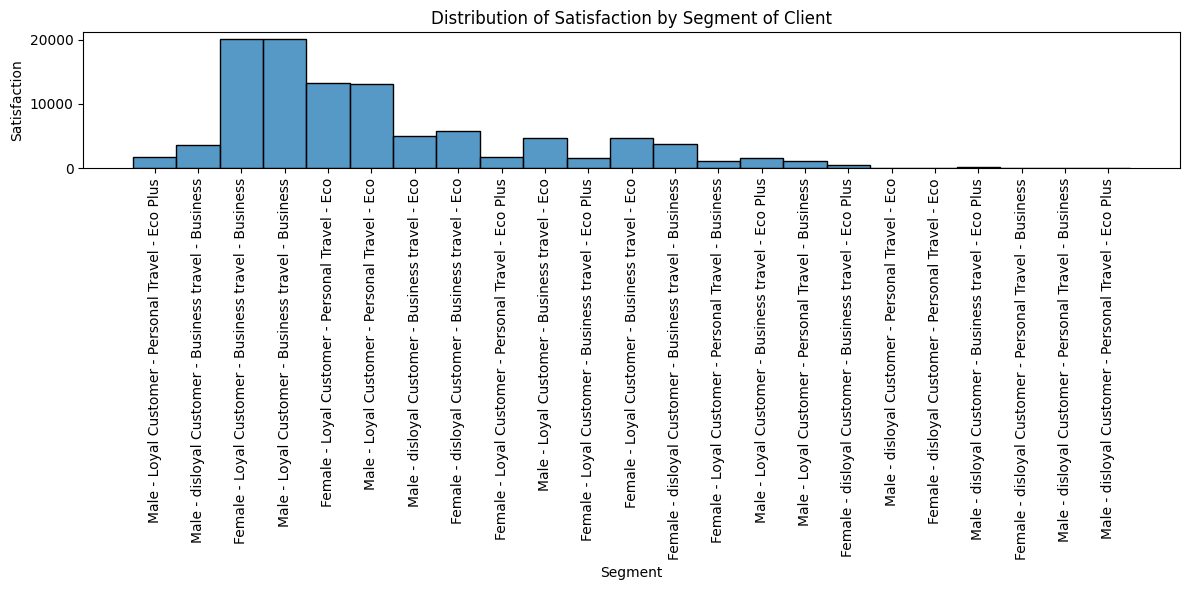

In [92]:

# Crear una columna 'Segmento' que combine las categorías relevantes para la visualización
data['Segment'] = data['Gender'] + ' - ' + data['Customer Type'] + ' - ' + data['Type of Travel'] + ' - ' + data['Class']

# Convertir la columna de satisfacción a valores numéricos para el gráfico
#data['Satisfaction Score'] = data['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

# Crear el gráfico de violín
plt.figure(figsize=(12, 6))
#sns.violinplot(x='Segmento', y='Satisfaction Score', data=data, inner="point", scale='width')

#sns.countplot(x = data['Segmento'], hue = data['Satisfaction Score'] )

sns.histplot(x = data['Segment'])
# Personalizar el gráfico
plt.xticks(rotation=90)
plt.xlabel('Segment')
plt.ylabel('Satisfaction')
plt.title('Distribution of Satisfaction by Segment of Client')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Certainly! Here's the translation of your provided text:

**Observations:**
- Loyal customers appear to be more satisfied than disloyal ones.
- Personal trips tend to have higher satisfaction levels than business trips.
- The "Eco Plus" class shows higher satisfaction compared to the "Eco" class.

**Recommendations:**
- Focus on improving satisfaction for disloyal customers and business trips.
- Investigate the reasons behind satisfaction differences among service classes.

